# Data cleaning 

In [1]:
#import the relevant data packages
import pandas as pd
import numpy as np

In [2]:
#import the data from the previous step
covid_out = pd.read_csv('COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths_20240603.csv')
covid_waste = pd.read_csv('SARS-CoV-2_concentrations_measured_in_NYC_Wastewater_20240603.csv')

### our objectives are to 
    1) inspect the data
    2) remove or replace any null values
    3) reformat the dates to the same format
    4) remove any uncessary or duplicate columns
    5) prepare both data sets to have a similar time window 

## 1) inspect the data

In [3]:
# load the data
covid_out = pd.read_csv('COVID-19_Outcomes_by_Testing_Cohorts__Cases__Hospitalizations__and_Deaths_20240603.csv')
covid_waste = pd.read_csv('SARS-CoV-2_concentrations_measured_in_NYC_Wastewater_20240603.csv')

### now we are ready to begin data cleaning

I have prepared a for loop to create a helpful table to look at the data in a glance

In [4]:
# here is a helpful script to quickly look at the data in general
def column_summary(covid_out):
    summary_data = []
    
    for col_name in covid_out.columns:
        col_dtype = covid_out[col_name].dtype
        num_of_nulls = covid_out[col_name].isnull().sum()
        num_of_non_nulls = covid_out[col_name].notnull().sum()
        num_of_distinct_values = covid_out[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = covid_out[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = covid_out[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_covid_out = pd.DataFrame(summary_data)
    return summary_covid_out
summary_covid_out = column_summary(covid_out)
display(summary_covid_out)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,extract_date,object,0,176148,532,"{'10/01/2021': 625, '09/30/2021': 625, '09/29/..."
1,specimen_date,object,0,176148,643,"{'03/31/2020': 532, '03/13/2020': 532, '03/26/..."
2,Number_tested,int64,0,176148,14740,"{1: 6008, 2: 4459, 4: 1343, 3: 802, 63: 524, 9..."
3,Number_confirmed,int64,0,176148,6344,"{0: 8042, 1: 5333, 2: 1088, 4: 571, 5: 533, 6:..."
4,Number_hospitalized,int64,0,176148,1868,"{0: 13683, 1: 1996, 33: 1286, 16: 1070, 22: 10..."
5,Number_deaths,int64,0,176148,915,"{0: 22138, 1: 7585, 2: 6750, 3: 5690, 4: 4027,..."


We can see a few things require our attention
we need to standardize the dates

In [5]:
covid_out['specimen_date']=covid_out['specimen_date'].astype('str')
covid_out['specimen_date']= pd.to_datetime(covid_out['specimen_date'], errors= 'coerce')

there is a column that is called extract date.
according to the NYC website this column is to show when the test was performed
based on this we can drop this column

In [6]:
covid_out= covid_out.drop('extract_date', axis=1)

to keep the data neat the column names will be renamed with smaller letters

In [7]:
covid_out= covid_out.rename(columns={'specimen_date':'sample_date',
                                        'Number_tested':'number_tested',
                                        'Number_confirmed':'number_confirmed',
                                        'Number_hospitalized':'number_hospitalized',})


lets see the data again if our transformations worked.
we can use .head() to see the data at a glance

In [8]:
covid_out.head()

,sample_date,number_tested,number_confirmed,number_hospitalized,Number_deaths
0,2020-04-17,9979,3386,527,96
1,2020-02-08,1,0,0,0
2,2020-03-05,63,5,3,1
3,2020-04-09,9019,4803,1253,386
4,2020-04-03,9389,5523,1688,582


looks good. now lets double check for any missing values. we will use .isnull().sum()

In [9]:
covid_out.isnull().sum()

sample_date            169
number_tested            0
number_confirmed         0
number_hospitalized      0
Number_deaths            0
dtype: int64

it seems we have 169 entries missing dates.
if we look at our first chart we have 176148 entries.
with this in mind we will drop these data points in order to prepare the data for future analysis.
these missing data points is a small percent of our overal data and should not affect our analysis.

In [10]:
covid_out=covid_out.dropna()


### now repeat the same sets for covid_waste

In [11]:
def column_summary(covid_waste):
    summary_data = []
    
    for col_name in covid_waste.columns:
        col_dtype = covid_waste[col_name].dtype
        num_of_nulls = covid_waste[col_name].isnull().sum()
        num_of_non_nulls = covid_waste[col_name].notnull().sum()
        num_of_distinct_values = covid_waste[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = covid_waste[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = covid_waste[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_covid_waste = pd.DataFrame(summary_data)
    return summary_covid_waste
summary_covid_waste = column_summary(covid_waste)
display(summary_covid_waste)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Sample Date,object,0,5292,334,"{'02/04/2024': 28, '01/09/2024': 28, '02/20/20..."
1,Test date,object,21,5271,357,"{'02/08/2023': 28, '03/22/2023': 28, '04/12/20..."
2,WRRF Name,object,0,5292,14,"{'26th Ward': 378, 'Bowery Bay': 378, 'Coney I..."
3,WRRF Abbreviation,object,0,5292,14,"{'26W': 378, 'BB': 378, 'CI': 378, 'HP': 378, ..."
4,Concentration SARS-CoV-2 gene target (N1 Copie...,float64,173,5119,4822,"{86016.0: 3, 71880.0: 3, 75384.0: 3, 262.0: 3,..."
5,Per capita SARS-CoV-2 load (N1 copies per day ...,float64,207,5085,2085,"{10400000.0: 16, 11800000.0: 15, 11600000.0: 1..."
6,Annotation,object,3910,1382,67,"{'Multiplex Overlap Study': 336, 'This sample ..."
7,"Population Served, estimated",int64,0,5292,14,"{318262: 378, 894311: 378, 647635: 378, 781885..."
8,Technology,object,0,5292,3,"{'RT-qPCR - N1': 3290, 'dPCR - N1': 1358, 'dPC..."


Upon inspection of the NYC website about this data set the technology column is to note that there was a change in the kind of technolgy used to test the waste water after a certain point in time. Therefore it can be dropped.
The abbreviation column is a duplicate column of the testing site. Therefore it can be dropped.
The website further states that the annotation column has any notes as to why a test is delayed or about any abnormalities at the waste treatement site that delay the sampling of the waste water. Therefore it can be dropped.
The website also states the test date is when the analysis is performed. Therefore it can be dropped.

The date can also be standardized like the previous DataFrame.

The columns can also be renamed to small letters and shortened for convenience


In [12]:
covid_waste['Sample Date']=covid_waste['Sample Date'].astype('str')
covid_waste['Sample Date']= pd.to_datetime(covid_waste['Sample Date'], errors= 'coerce')

covid_waste= covid_waste.rename(columns={'Sample Date':'sample_date',
                                        'WRRF Name':'collection_site',
                                        'Concentration SARS-CoV-2 gene target (N1 Copies/L) ':'concentration',
                                        'Per capita SARS-CoV-2 load (N1 copies per day per population)':'per_capita',
                                        'Population Served, estimated ':'est_pop'})


looks good. now lets double check for any missing values. we will use .isnull().sum()

In [13]:
covid_waste.isnull().sum()

sample_date             0
Test date              21
collection_site         0
WRRF Abbreviation       0
concentration         173
per_capita            207
Annotation           3910
est_pop                 0
Technology              0
dtype: int64

upon checking the website some dates dont have a sample collection for various reasons. with that in mind we will just drop the null data.
we need to see the concentration of COVID genetic material over time. imputing the data with the average or median result may be detrimental to our ability to predict future outcomes

In [14]:
covid_waste=covid_waste.dropna()

In [15]:
covid_waste.isnull().sum()

sample_date          0
Test date            0
collection_site      0
WRRF Abbreviation    0
concentration        0
per_capita           0
Annotation           0
est_pop              0
Technology           0
dtype: int64

In [16]:
covid_waste.head()

,sample_date,Test date,collection_site,WRRF Abbreviation,concentration,per_capita,Annotation,est_pop,Technology
0,2020-08-31,09/01/2020,26th Ward,26W,389.0,264000.0,Concentration below Method Limit of Quantifica...,318262,RT-qPCR - N1
2,2020-08-31,09/01/2020,Coney Island,CI,304.0,169000.0,Concentration below Method Limit of Quantifica...,647635,RT-qPCR - N1
5,2020-08-31,09/01/2020,Newtown Creek,NC,197.0,122000.0,Concentration below Method Limit of Quantifica...,1227810,RT-qPCR - N1
11,2020-08-31,09/01/2020,Rockaway,RK,371.0,210000.0,Concentration below Method Limit of Quantifica...,117991,RT-qPCR - N1
12,2020-08-31,09/01/2020,Tallman Island,TI,571.0,250000.0,Concentration below Method Limit of Quantifica...,457817,RT-qPCR - N1


### selecting a window of time
we want to predict a spike in waste water material before we see it spike in the general population. lets investiage the date ranges of our data

In [17]:
print(covid_out['sample_date'].max())
print(covid_out['sample_date'].min())
print('covid out dates')

print(covid_waste['sample_date'].max())
print(covid_waste['sample_date'].min())
print('covid waste dates')

2021-09-28 00:00:00
2020-01-01 00:00:00
covid out dates
2024-05-14 00:00:00
2020-08-31 00:00:00
covid waste dates


We can see COVID waste has a wider date range. we should select the date that are in common between the DataFrames

In [18]:
mask1 = (covid_waste['sample_date'] > '2020-08-01') & (covid_waste['sample_date'] <= '2021-09-01')

covid_waste_short= covid_waste.loc[mask1]
print(covid_waste_short.head())

mask2 = (covid_out['sample_date'] > '2020-08-01') & (covid_out['sample_date'] <= '2021-09-01')
covid_out_short= covid_out.loc[mask2]
print(covid_out_short.head())


   sample_date   Test date collection_site WRRF Abbreviation  concentration  \
0   2020-08-31  09/01/2020       26th Ward               26W          389.0   
2   2020-08-31  09/01/2020    Coney Island                CI          304.0   
5   2020-08-31  09/01/2020   Newtown Creek                NC          197.0   
11  2020-08-31  09/01/2020        Rockaway                RK          371.0   
12  2020-08-31  09/01/2020  Tallman Island                TI          571.0   

    per_capita                                         Annotation  est_pop  \
0     264000.0  Concentration below Method Limit of Quantifica...   318262   
2     169000.0  Concentration below Method Limit of Quantifica...   647635   
5     122000.0  Concentration below Method Limit of Quantifica...  1227810   
11    210000.0  Concentration below Method Limit of Quantifica...   117991   
12    250000.0  Concentration below Method Limit of Quantifica...   457817   

      Technology  
0   RT-qPCR - N1  
2   RT-qPCR - N1  

## lets visualize the data

In [20]:
#lets graph the data of the data ranges are the same
import matplotlib.pyplot as plt

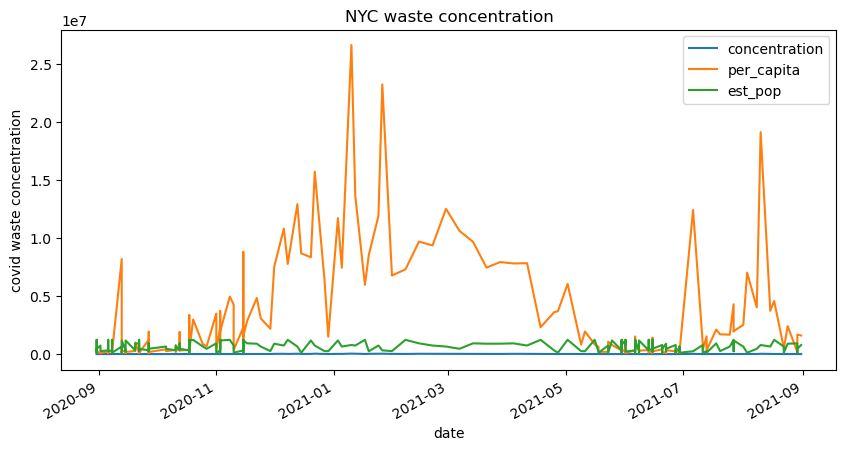

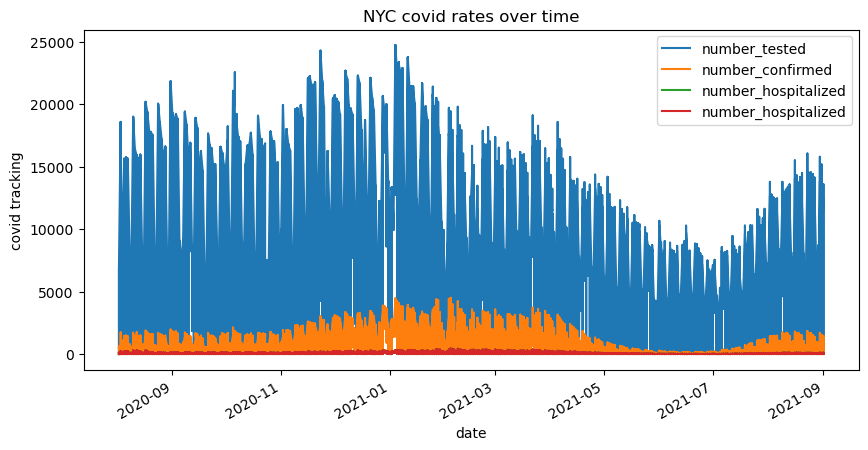

In [21]:
covid_waste_short.plot(x='sample_date', y=['collection_site', 'concentration', 'per_capita', 'est_pop'], figsize=(10,5))
                 
plt.xlabel('date')

plt.ylabel('covid waste concentration')

plt.title('NYC waste concentration')

plt.show()




covid_out_short.plot(x='sample_date', y=['number_tested', 'number_confirmed', 'number_hospitalized', 'number_hospitalized'],figsize=(10,5))

plt.xlabel('date')

plt.ylabel('covid tracking')

plt.title('NYC covid rates over time')

plt.show()



Things look promising.
we are ready for the next step Exploratory Data Analysis.